```

author : "Amit Yadav"
email : "amitech90@gmail.com"
github : "[warriorwizard](https://github.com/warriorwizard)"


```

{'image': '6fd3a436-601d-11ee-87ca-c8940281d832.30.jpg', 'class': [1, 1, 1, 1], 'keypoint': [133.984375, 123.4375, 156.25, 107.29166666666666, 146.09375, 142.1875, 165.234375, 127.08333333333333]}
[133.984375   123.4375     156.25       107.29166667 146.09375
 142.1875     165.234375   127.08333333]
img shape (480, 640, 3)
img shape (480, 640, 3)
img shape (480, 640, 3)
img shape (480, 640, 3)
{'image': '66d4b65e-601d-11ee-aec1-c8940281d832.24.jpg', 'class': [1, 1, 1, 1], 'keypoint': [131.25, 153.64583333333334, 138.671875, 125.52083333333333, 151.171875, 165.10416666666666, 158.984375, 135.41666666666666]}
[131.25       153.64583333 138.671875   125.52083333 151.171875
 165.10416667 158.984375   135.41666667]
img shape (480, 640, 3)
img shape (480, 640, 3)
img shape (480, 640, 3)
img shape (480, 640, 3)
{'image': '752aa101-601d-11ee-a360-c8940281d832.36.jpg', 'class': [1, 1, 1, 1], 'keypoint': [107.421875, 84.89583333333334, 125.78125000000001, 89.58333333333333, 100.390625, 98.958333

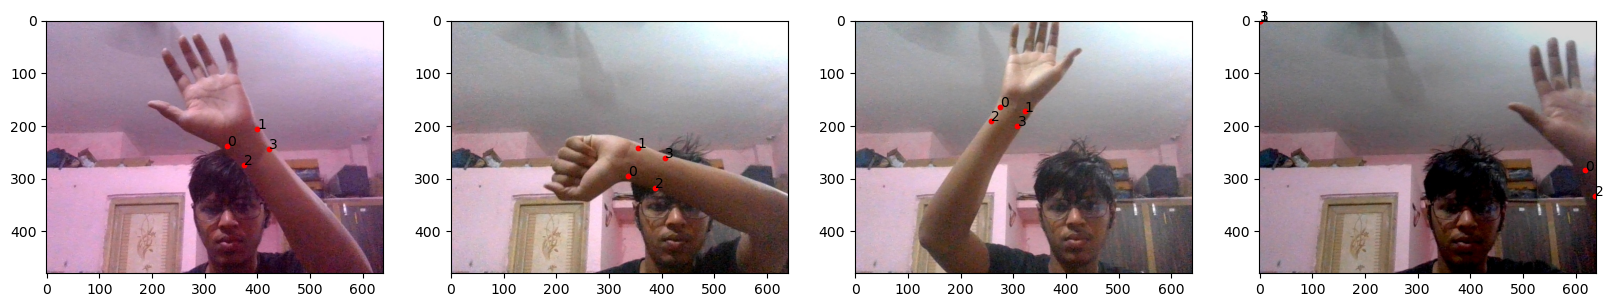

In [80]:
# visualize images and labels on the same image

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import json
import random

# load data
path = 'data\\aug_data\\test\images'
label_path = 'data\\aug_data\\test\labels'

images = os.listdir(path)

fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for i in range(4):
    # load image
    ran = random.randint(0, len(images))
    img = cv2.imread(os.path.join(path, images[ran]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # load label
    label = images[ran].split('.jpg')[0] + '.json'
    with open(os.path.join(label_path, label)) as f:
        data = json.load(f)
    
    print(data)
    np_keypoints = np.array(data['keypoint'])
    print(np_keypoints)

    # plot keypoints

    for j in range(0, len(np_keypoints), 2):
        print('img shape', img.shape)
        np_keypoints[j] = np_keypoints[j] /250* img.shape[1]
        np_keypoints[j+1] = np_keypoints[j+1]/250 * img.shape[0]
        ax[i].scatter(np_keypoints[j], np_keypoints[j+1], s=10, c='r')
        ax[i].text(np_keypoints[j], np_keypoints[j+1], str(j//2), fontsize=10)
    # plot image
    ax[i].imshow(img)
    
    # plot label


In [53]:
import pandas as pd
import numpy as np

# Read in the data from csv

# data.columns = ['annotation', 'width', 'height', 'name', 'width_image', 'height_image']
data = pd.read_csv('data\labels\labels_my-project-name_2023-10-01-11-42-50.csv', names=['annotation', 'width', 'height', 'name', 'width_image', 'height_image'])

# assing headers to the data
data.head()


,annotation,width,height,name,width_image,height_image
0,wrist_1st,352,200,5d8a276c-601d-11ee-a3cb-c8940281d832.jpg,640,480
1,wrist_2nd,412,213,5d8a276c-601d-11ee-a3cb-c8940281d832.jpg,640,480
2,wrist_3rd,332,236,5d8a276c-601d-11ee-a3cb-c8940281d832.jpg,640,480
3,wrist_4th,385,253,5d8a276c-601d-11ee-a3cb-c8940281d832.jpg,640,480
4,wrist_1st,357,199,5ddcf007-601d-11ee-88a1-c8940281d832.jpg,640,480


# Conversion from csv to json

In [29]:
grouped = data.groupby('name')

output = []

# List of wrist annotations to check
wrist_annotations = ['wrist_1st', 'wrist_2nd', 'wrist_3rd', 'wrist_4th']

for image_name, group in grouped:
    # Initialize lists
    class_list = [0, 0, 0, 0]
    keypoints = [0, 0, 0, 0, 0, 0, 0, 0]
    
    for _, row in group.iterrows():
        if row['annotation'] in wrist_annotations:
            index = wrist_annotations.index(row['annotation'])
            class_list[index] = 1
            keypoints[2*index] = row['width']
            keypoints[2*index+1] = row['height']
    
    formatted_data = {
        'image': image_name,
        'class': class_list,
        'keypoint': keypoints
    }
    
    output.append(formatted_data)

# print first item for demonstration
print(output[0])

{'image': '5d8a276c-601d-11ee-a3cb-c8940281d832.jpg', 'class': [1, 1, 1, 1], 'keypoint': [352, 200, 412, 213, 332, 236, 385, 253]}


In [54]:
import json
import os

grouped = data.groupby('name')

output = []

# List of wrist annotations to check
wrist_annotations = ['wrist_1st', 'wrist_2nd', 'wrist_3rd', 'wrist_4th']

for image_name, group in grouped:
    # Initialize lists
    class_list = [0, 0, 0, 0]
    keypoints = [0, 0, 0, 0, 0, 0, 0, 0]
    
    for _, row in group.iterrows():
        if row['annotation'] in wrist_annotations:
            index = wrist_annotations.index(row['annotation'])
            class_list[index] = 1
            # Normalize the keypoints and not converting it currently for 250x250 image
            
            # keypoints[2*index] = row['width'] / row['width_image'] 
            # keypoints[2*index+1] = row['height'] / row['height_image'] 

            keypoints[2*index] = row['width'] 
            keypoints[2*index+1] = row['height'] 
    
    formatted_data = {
        'image': image_name,
        'class': class_list,
        'keypoint': keypoints
    }
    
    output.append(formatted_data)

    # Save each image's data as a JSON file
    json_filename = os.path.splitext(image_name)[0] + '.json'
    with open(json_filename, 'w') as json_file:
        json.dump(formatted_data, json_file, indent=4)


# Image Augmentation

In [68]:
import albumentations as alb
# alb.KeypointParams??

In [79]:
import os
import json
import cv2
import numpy as np
import albumentations as alb

# Define augmentations
class_labels = ['wrist_1st', 'wrist_2nd', 'wrist_3rd', 'wrist_4th']

augmentor = alb.Compose([
                        # alb.RandomCrop(width=640, height=480), 
                        #  alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2)], 
                        #  alb.VerticalFlip(p=0.5)], 
                        keypoint_params=alb.KeypointParams(format='xy'))



base_path = './data/'

for partition in ['train', 'test', 'val']:
    image_path = os.path.join(base_path, 'images')
    label_path = os.path.join(base_path, 'labels')
    aug_image_path = os.path.join(base_path, 'aug_data', partition, 'images')
    aug_label_path = os.path.join(base_path, 'aug_data', partition, 'labels')
    
    os.makedirs(aug_image_path, exist_ok=True)
    os.makedirs(aug_label_path, exist_ok=True)
    
    for image_name in os.listdir(image_path):
        img = cv2.imread(os.path.join(image_path, image_name))
        label_filename = f"{image_name.split('.')[0]}.json"
        
        if os.path.exists(os.path.join(label_path, label_filename)):
            with open(os.path.join(label_path, label_filename), 'r') as f:
                label = json.load(f)
                
            # normalize the keypoints and convert it for 250x250 image
            width_image = 640
            height_image = 480

            label['keypoint'][0] = label['keypoint'][0] / width_image * 250
            label['keypoint'][1] = label['keypoint'][1] / height_image * 250
            label['keypoint'][2] = label['keypoint'][2] / width_image * 250
            label['keypoint'][3] = label['keypoint'][3] / height_image * 250
            label['keypoint'][4] = label['keypoint'][4] / width_image * 250
            label['keypoint'][5] = label['keypoint'][5] / height_image * 250
            label['keypoint'][6] = label['keypoint'][6] / width_image * 250
            label['keypoint'][7] = label['keypoint'][7] / height_image * 250

            # Convert keypoints to a list of tuples
            keypoints = np.array(label['keypoint']).reshape(-1, 2).tolist()
            # keypoints = [tuple(label['keypoint'][:2]), tuple(label['keypoint'][2:])]
            print("keypoints", keypoints)
            

            for x in range(45):
                augmented = augmentor(image=img, keypoints=keypoints)
                
                # Check if keypoints are present after augmentation
                if not augmented['keypoints']:
                    continue  # Skip this iteration if keypoints are empty
                
                aug_img_name = f"{image_name.split('.')[0]}.{x}.jpg"
                cv2.imwrite(os.path.join(aug_image_path, aug_img_name), augmented['image'])
                
                # Convert keypoints to a flat list and to native Python data types
                flat_keypoints = [float(coord) for point in augmented['keypoints'] for coord in point]
                
                
                annotation = {
                    'image': aug_img_name,
                    'class': [int(i) for i in label['class']],  # Convert class to native int type
                    'keypoint': flat_keypoints
                }
                
                with open(os.path.join(aug_label_path, f"{image_name.split('.')[0]}.{x}.json"), 'w') as f:
                    json.dump(annotation, f)



keypoints [[137.5, 104.16666666666667], [160.9375, 110.9375], [129.6875, 122.91666666666666], [150.390625, 131.77083333333334]]
keypoints [[139.453125, 103.64583333333334], [164.0625, 110.41666666666666], [127.34375, 121.875], [153.515625, 130.72916666666669]]
keypoints [[132.8125, 102.60416666666666], [155.078125, 109.89583333333333], [121.09375, 118.75], [145.703125, 127.08333333333333]]
keypoints [[117.578125, 93.75], [139.453125, 102.08333333333333], [110.9375, 108.85416666666667], [135.546875, 120.3125]]
keypoints [[106.640625, 99.47916666666666], [131.640625, 105.72916666666667], [100.390625, 116.66666666666667], [124.21875, 123.4375]]
keypoints [[92.578125, 107.29166666666666], [111.71875, 108.33333333333334], [85.15625, 123.4375], [106.25, 123.4375]]
keypoints [[71.09375, 106.77083333333333], [93.359375, 106.25], [66.015625, 125.52083333333333], [91.015625, 122.91666666666666]]
keypoints [[55.078125, 110.41666666666666], [76.5625, 114.0625], [51.171875, 130.20833333333334], [73